In [1]:
import pandas as pd

chosen_file = "../dataset/standardised.penguins.csv"

file_name = chosen_file.split("/")[-1]
data_set_name = file_name.split(".")[1]

# getting the headers
file = open(chosen_file, "r")
header_line = file.readline()
file.close()

headers = header_line.split(",")
headers[-1] = headers[-1].replace("\n", "")

# read the file
df = pd.read_csv(chosen_file, encoding = 'ISO-8859-1')

# perform one-hot encoding on the categorical columns
catagorical_columns = [2, 7, 8]
catagorical_columns = [i - 1 for i in catagorical_columns]
catagorical_columns_names = [headers[i] for i in catagorical_columns]
df = pd.get_dummies(df, columns = catagorical_columns_names, drop_first = True)
    
# move the target column to the last column
df = df[[col for col in df.columns if col != "species"] + ["species"]]

# amount of rows and columns in the dataset
print(df.shape)

(333, 10)


In [2]:
# print the first 5 rows of the dataset
df.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male,year_2008,year_2009,species
0,39.1,18.7,181,3750,False,True,True,False,False,Adelie
1,39.5,17.4,186,3800,False,True,False,False,False,Adelie
2,40.3,18.0,195,3250,False,True,False,False,False,Adelie
3,36.7,19.3,193,3450,False,True,False,False,False,Adelie
4,39.3,20.6,190,3650,False,True,True,False,False,Adelie


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# split the dataset into features and labels
# the last column is the label, the rest are features

target_col = headers[0]
x = df.drop(columns = [target_col])
y = df[target_col]

# create a list of all the test sizes to be used
all_test_ratio = [0.6, 0.4, 0.2, 0.1]

xtest1, xtest2, xtest3, xtest4 = 0, 0, 0, 0
ytest1, ytest2, ytest3, ytest4 = 0, 0, 0, 0
xtrain1, xtrain2, xtrain3, xtrain4 = 0, 0, 0, 0
ytrain1, ytrain2, ytrain3, ytrain4 = 0, 0, 0, 0

# split the dataset into training and testing sets, test_size determine testing data/training data ratio
random_state_choice_1 = 1
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size = all_test_ratio[0], random_state = random_state_choice_1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size = all_test_ratio[1], random_state = random_state_choice_1)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x, y, test_size = all_test_ratio[2], random_state = random_state_choice_1)
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x, y, test_size = all_test_ratio[3], random_state = random_state_choice_1)

test_lables_x = [xtest1, xtest2, xtest3, xtest4]
test_lables_y = [ytest1, ytest2, ytest3, ytest4]
train_lables_x = [xtrain1, xtrain2, xtrain3, xtrain4]
train_lables_y = [ytrain1, ytrain2, ytrain3, ytrain4]

# begin training
max_depth_choice = 7
random_state_choice_2 = 1
trained_model1 = DecisionTreeClassifier(max_depth = max_depth_choice, random_state = random_state_choice_2, criterion='entropy')
trained_model1.fit(xtrain1, ytrain1)
trained_model2 = DecisionTreeClassifier(max_depth = max_depth_choice, random_state = random_state_choice_2, criterion='entropy')
trained_model2.fit(xtrain2, ytrain2)
trained_model3 = DecisionTreeClassifier(max_depth = max_depth_choice, random_state = random_state_choice_2, criterion='entropy')
trained_model3.fit(xtrain3, ytrain3)
trained_model4 = DecisionTreeClassifier(max_depth = max_depth_choice, random_state = random_state_choice_2, criterion='entropy')
trained_model4.fit(xtrain4, ytrain4)


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

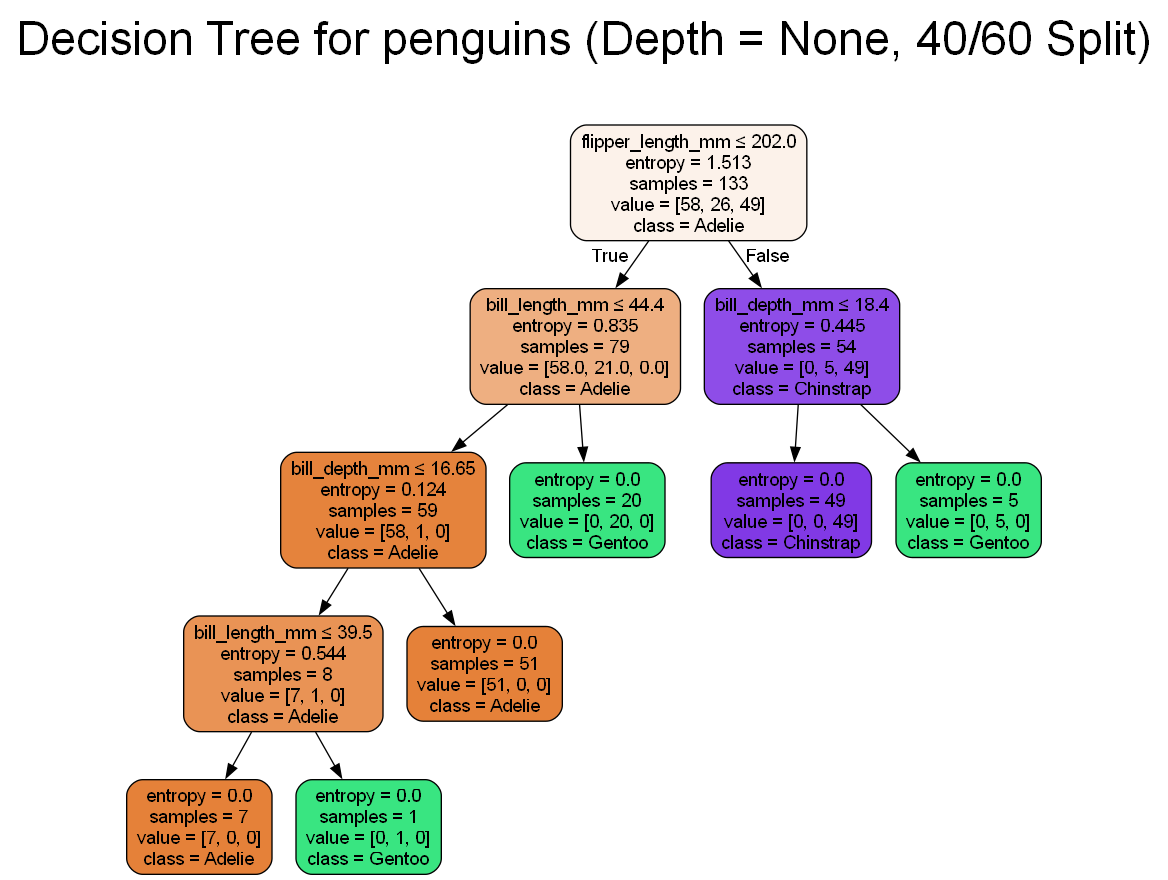

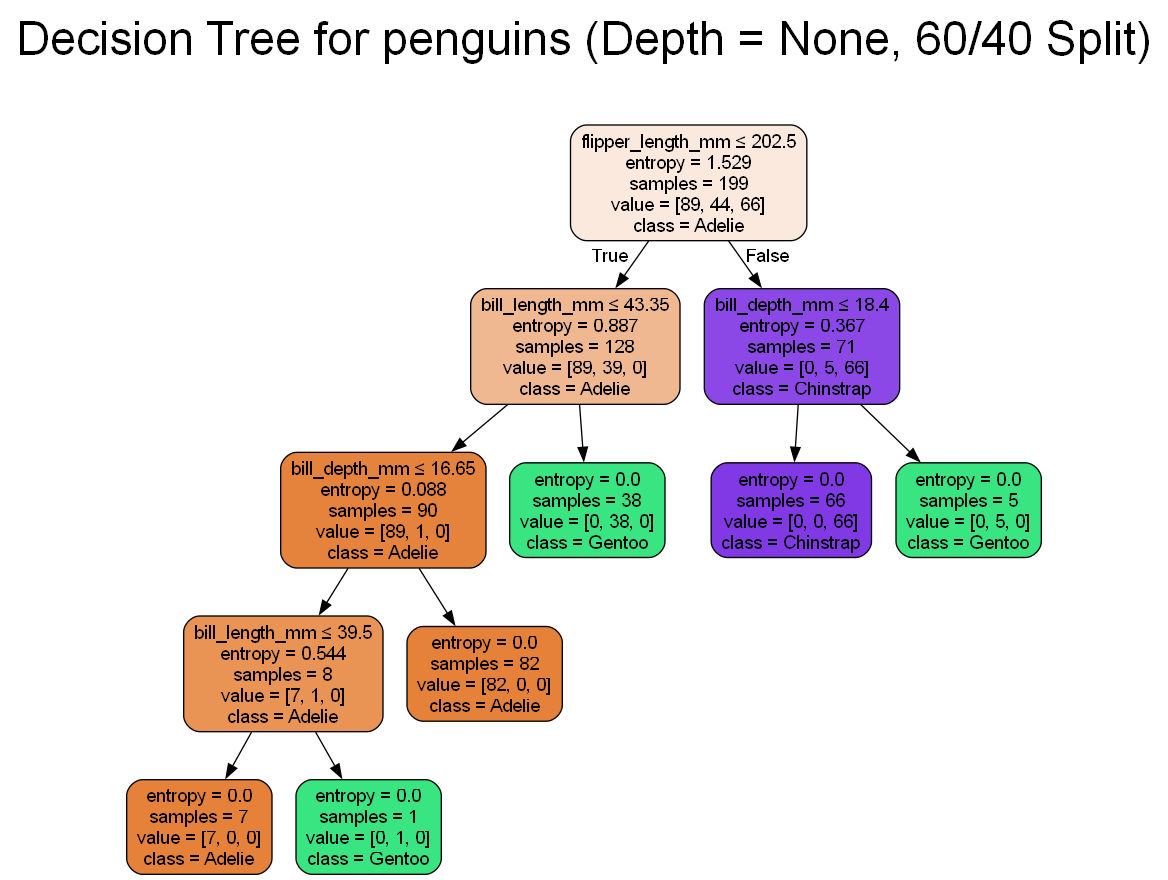

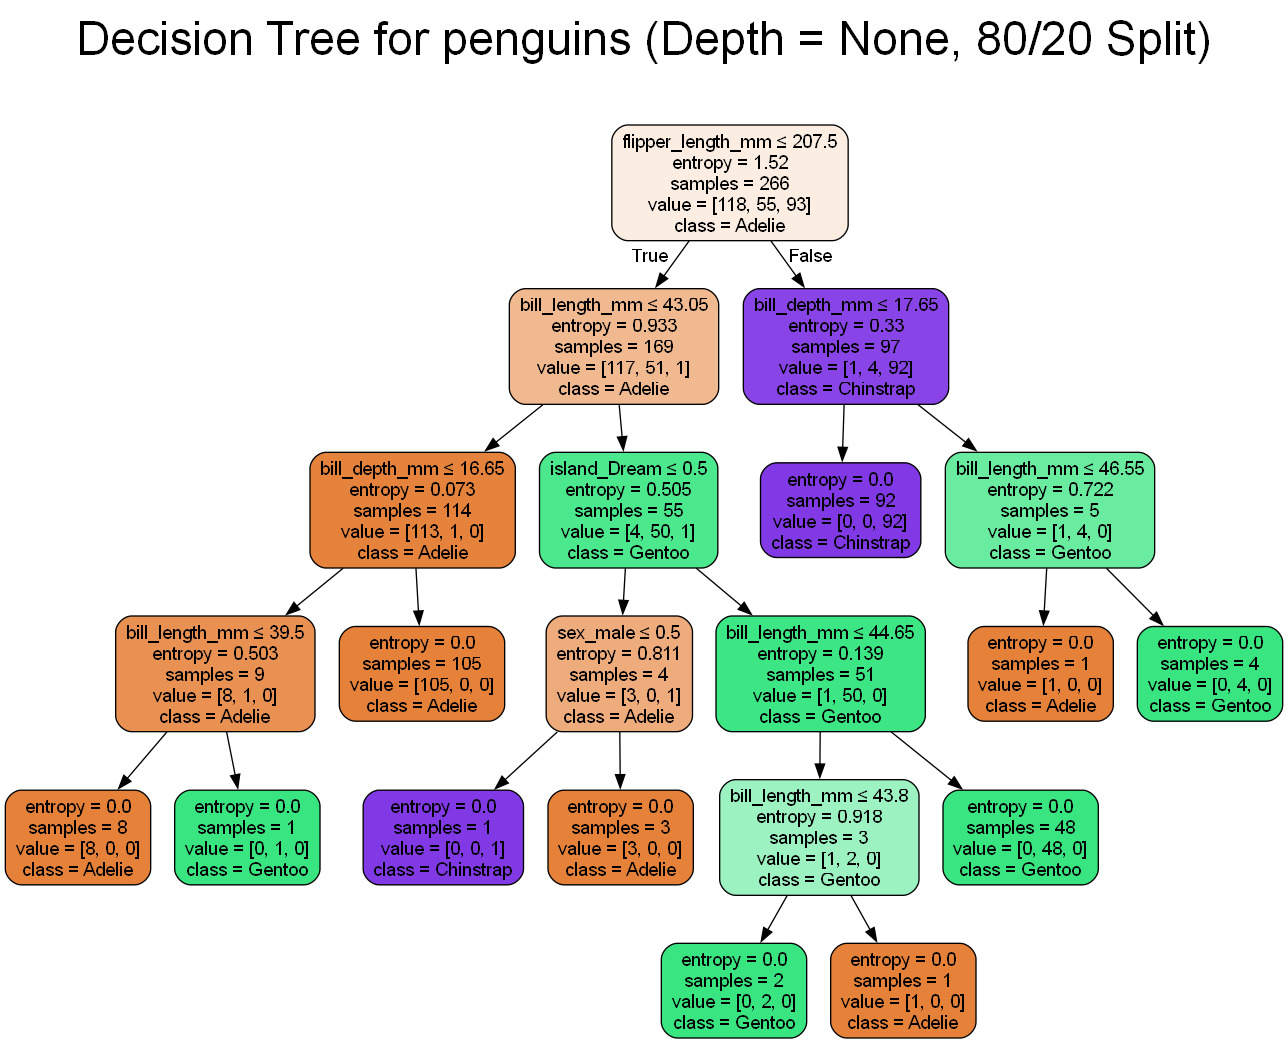

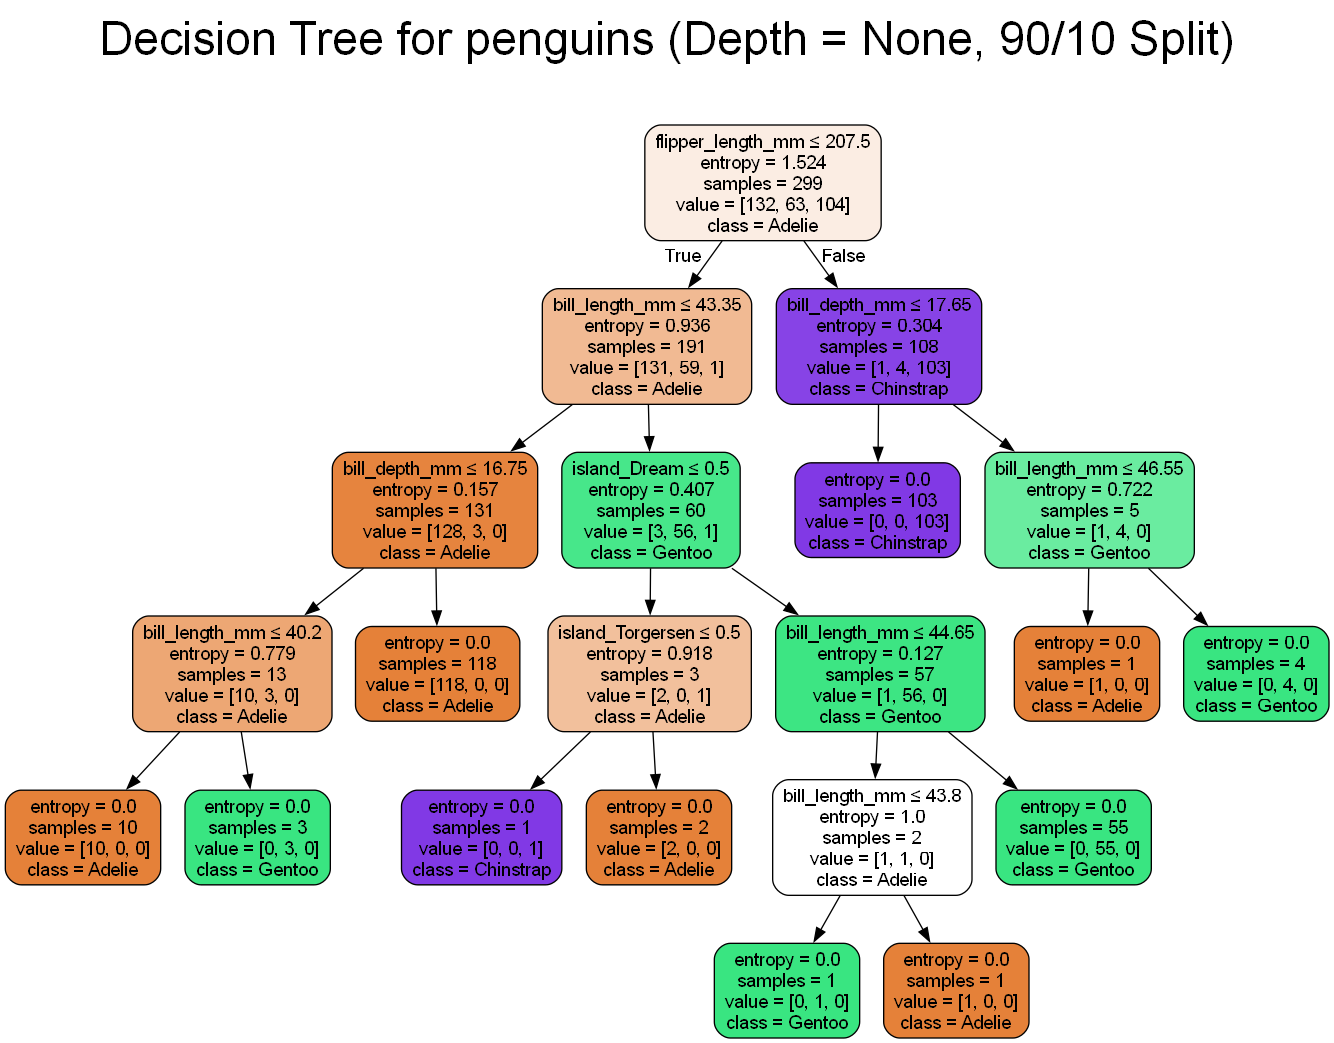

In [4]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

output_folder = r"../output_penguins/"
class_names = ["Adelie", "Gentoo", "Chinstrap"]

# Hàm lưu cây quyết định dưới dạng file PNG
def save_and_show_tree(model, feature_names, class_names, output_file_name, title_text):
    # Xuất cây dưới dạng DOT
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )

    # Add label to the graph settings
    dot_data = dot_data.replace('digraph Tree {', f'digraph Tree {{\nlabel="{title_text}\n\n";\nlabelloc="t";\nfontsize=35;\nfontname="helvetica"')

    # Tạo file PNG từ graphviz
    graph = graphviz.Source(dot_data)
    graph.render(output_file_name, format="png", cleanup=True)
    
    return Image(filename=output_file_name + ".png")

#Lưu và hiển thị từng cây
title1 = f"Decision Tree for {data_set_name} (Depth = None, {int((1 - all_test_ratio[0]) * 100)}/{int(all_test_ratio[0] * 100)} Split)"
output_file_name1 = output_folder + f"{1 - all_test_ratio[0]}train-{all_test_ratio[0]}test_{data_set_name}"
display(save_and_show_tree(trained_model1, xtrain1.columns, class_names, output_file_name1, title1))

title2 = f"Decision Tree for {data_set_name} (Depth = None, {int((1 - all_test_ratio[1]) * 100)}/{int(all_test_ratio[1] * 100)} Split)"
output_file_name2 = output_folder + f"{1 - all_test_ratio[1]}train-{all_test_ratio[1]}test_{data_set_name}"
display(save_and_show_tree(trained_model2, xtrain2.columns, class_names, output_file_name2, title2))

title3 = f"Decision Tree for {data_set_name} (Depth = None, {int((1 - all_test_ratio[2]) * 100)}/{int(all_test_ratio[2] * 100)} Split)"
output_file_name3 = output_folder + f"{1 - all_test_ratio[2]}train-{all_test_ratio[2]}test_{data_set_name}"
display(save_and_show_tree(trained_model3, xtrain3.columns, class_names, output_file_name3, title3))

title4 = f"Decision Tree for {data_set_name} (Depth = None, {int((1 - all_test_ratio[3]) * 100)}/{int(all_test_ratio[3] * 100)} Split)"
output_file_name4 = output_folder + f"{1 - all_test_ratio[3]}train-{all_test_ratio[3]}test_{data_set_name}"
display(save_and_show_tree(trained_model4, xtrain4.columns, class_names, output_file_name4, title4))

In [5]:
# test the model on the testing set and print the accuracy of the model

y_prediction_unseen1 = trained_model1.predict(xtest1)
y_prediction_trained1 = trained_model1.predict(xtrain1)

y_prediction_unseen2 = trained_model2.predict(xtest2)
y_prediction_trained2 = trained_model2.predict(xtrain2)

y_prediction_unseen3 = trained_model3.predict(xtest3)
y_prediction_trained3 = trained_model3.predict(xtrain3)

y_prediction_unseen4 = trained_model4.predict(xtest4)
y_prediction_trained4 = trained_model4.predict(xtrain4)

from sklearn.metrics import accuracy_score

trained_data_accuracy1 = accuracy_score(ytrain1, y_prediction_trained1)
trained_data_accuracy2 = accuracy_score(ytrain2, y_prediction_trained2)
trained_data_accuracy3 = accuracy_score(ytrain3, y_prediction_trained3)
trained_data_accuracy4 = accuracy_score(ytrain4, y_prediction_trained4)

unseen_data_accuracy1 = accuracy_score(ytest1, y_prediction_unseen1)
unseen_data_accuracy2 = accuracy_score(ytest2, y_prediction_unseen2)
unseen_data_accuracy3 = accuracy_score(ytest3, y_prediction_unseen3)
unseen_data_accuracy4 = accuracy_score(ytest4, y_prediction_unseen4)

print(f"Trained data accuracy for {1 - all_test_ratio[0]} train-{all_test_ratio[0]} test: {trained_data_accuracy1:.2f}")
print(f"Unseen data accuracy for {1 - all_test_ratio[0]} train-{all_test_ratio[0]} test: {unseen_data_accuracy1:.2f}")
print()
print(f"Trained data accuracy for {1 - all_test_ratio[1]} train-{all_test_ratio[1]} test: {trained_data_accuracy2:.2f}")
print(f"Unseen data accuracy for {1 - all_test_ratio[1]} train-{all_test_ratio[1]} test: {unseen_data_accuracy2:.2f}")
print()
print(f"Trained data accuracy for {1 - all_test_ratio[2]} train-{all_test_ratio[2]} test: {trained_data_accuracy3:.2f}")
print(f"Unseen data accuracy for {1 - all_test_ratio[2]} train-{all_test_ratio[2]} test: {unseen_data_accuracy3:.2f}")
print()
print(f"Trained data accuracy for {1 - all_test_ratio[3]} train-{all_test_ratio[3]} test: {trained_data_accuracy4:.2f}")
print(f"Unseen data accuracy for {1 - all_test_ratio[3]} train-{all_test_ratio[3]} test: {unseen_data_accuracy4:.2f}")

# ideally, the accuracy on the training data should be higher than the accuracy on the testing data and they should be close to each other
# if trained acc is high but unseen acc is low, then the model is overfitting
# if both are low, then the model is underfitting
# if both are high, then the model is good


# save the lables for the confusion matrix
result_labels = [y_prediction_unseen1, y_prediction_unseen2, y_prediction_unseen3, y_prediction_unseen4]
result_labels_train = [y_prediction_trained1, y_prediction_trained2, y_prediction_trained3, y_prediction_trained4]

output_file = output_folder + "result_labels" + "_" + data_set_name + ".txt"
lable_file = open(output_file, "w")

for i in range(4):
    lable_file.write("Test ratio: " + str(all_test_ratio[i]) + "\n")
    lable_file.write("Unseen data real labels:\n" + str(test_lables_y[i].values) + "\n")
    lable_file.write("Unseen data predictions:\n" + str(result_labels[i]) + "\n")
    lable_file.write("\n")

lable_file.close()

Trained data accuracy for 0.4 train-0.6 test: 1.00
Unseen data accuracy for 0.4 train-0.6 test: 0.94

Trained data accuracy for 0.6 train-0.4 test: 1.00
Unseen data accuracy for 0.6 train-0.4 test: 0.92

Trained data accuracy for 0.8 train-0.2 test: 1.00
Unseen data accuracy for 0.8 train-0.2 test: 0.94

Trained data accuracy for 0.9 train-0.1 test: 1.00
Unseen data accuracy for 0.9 train-0.1 test: 0.91


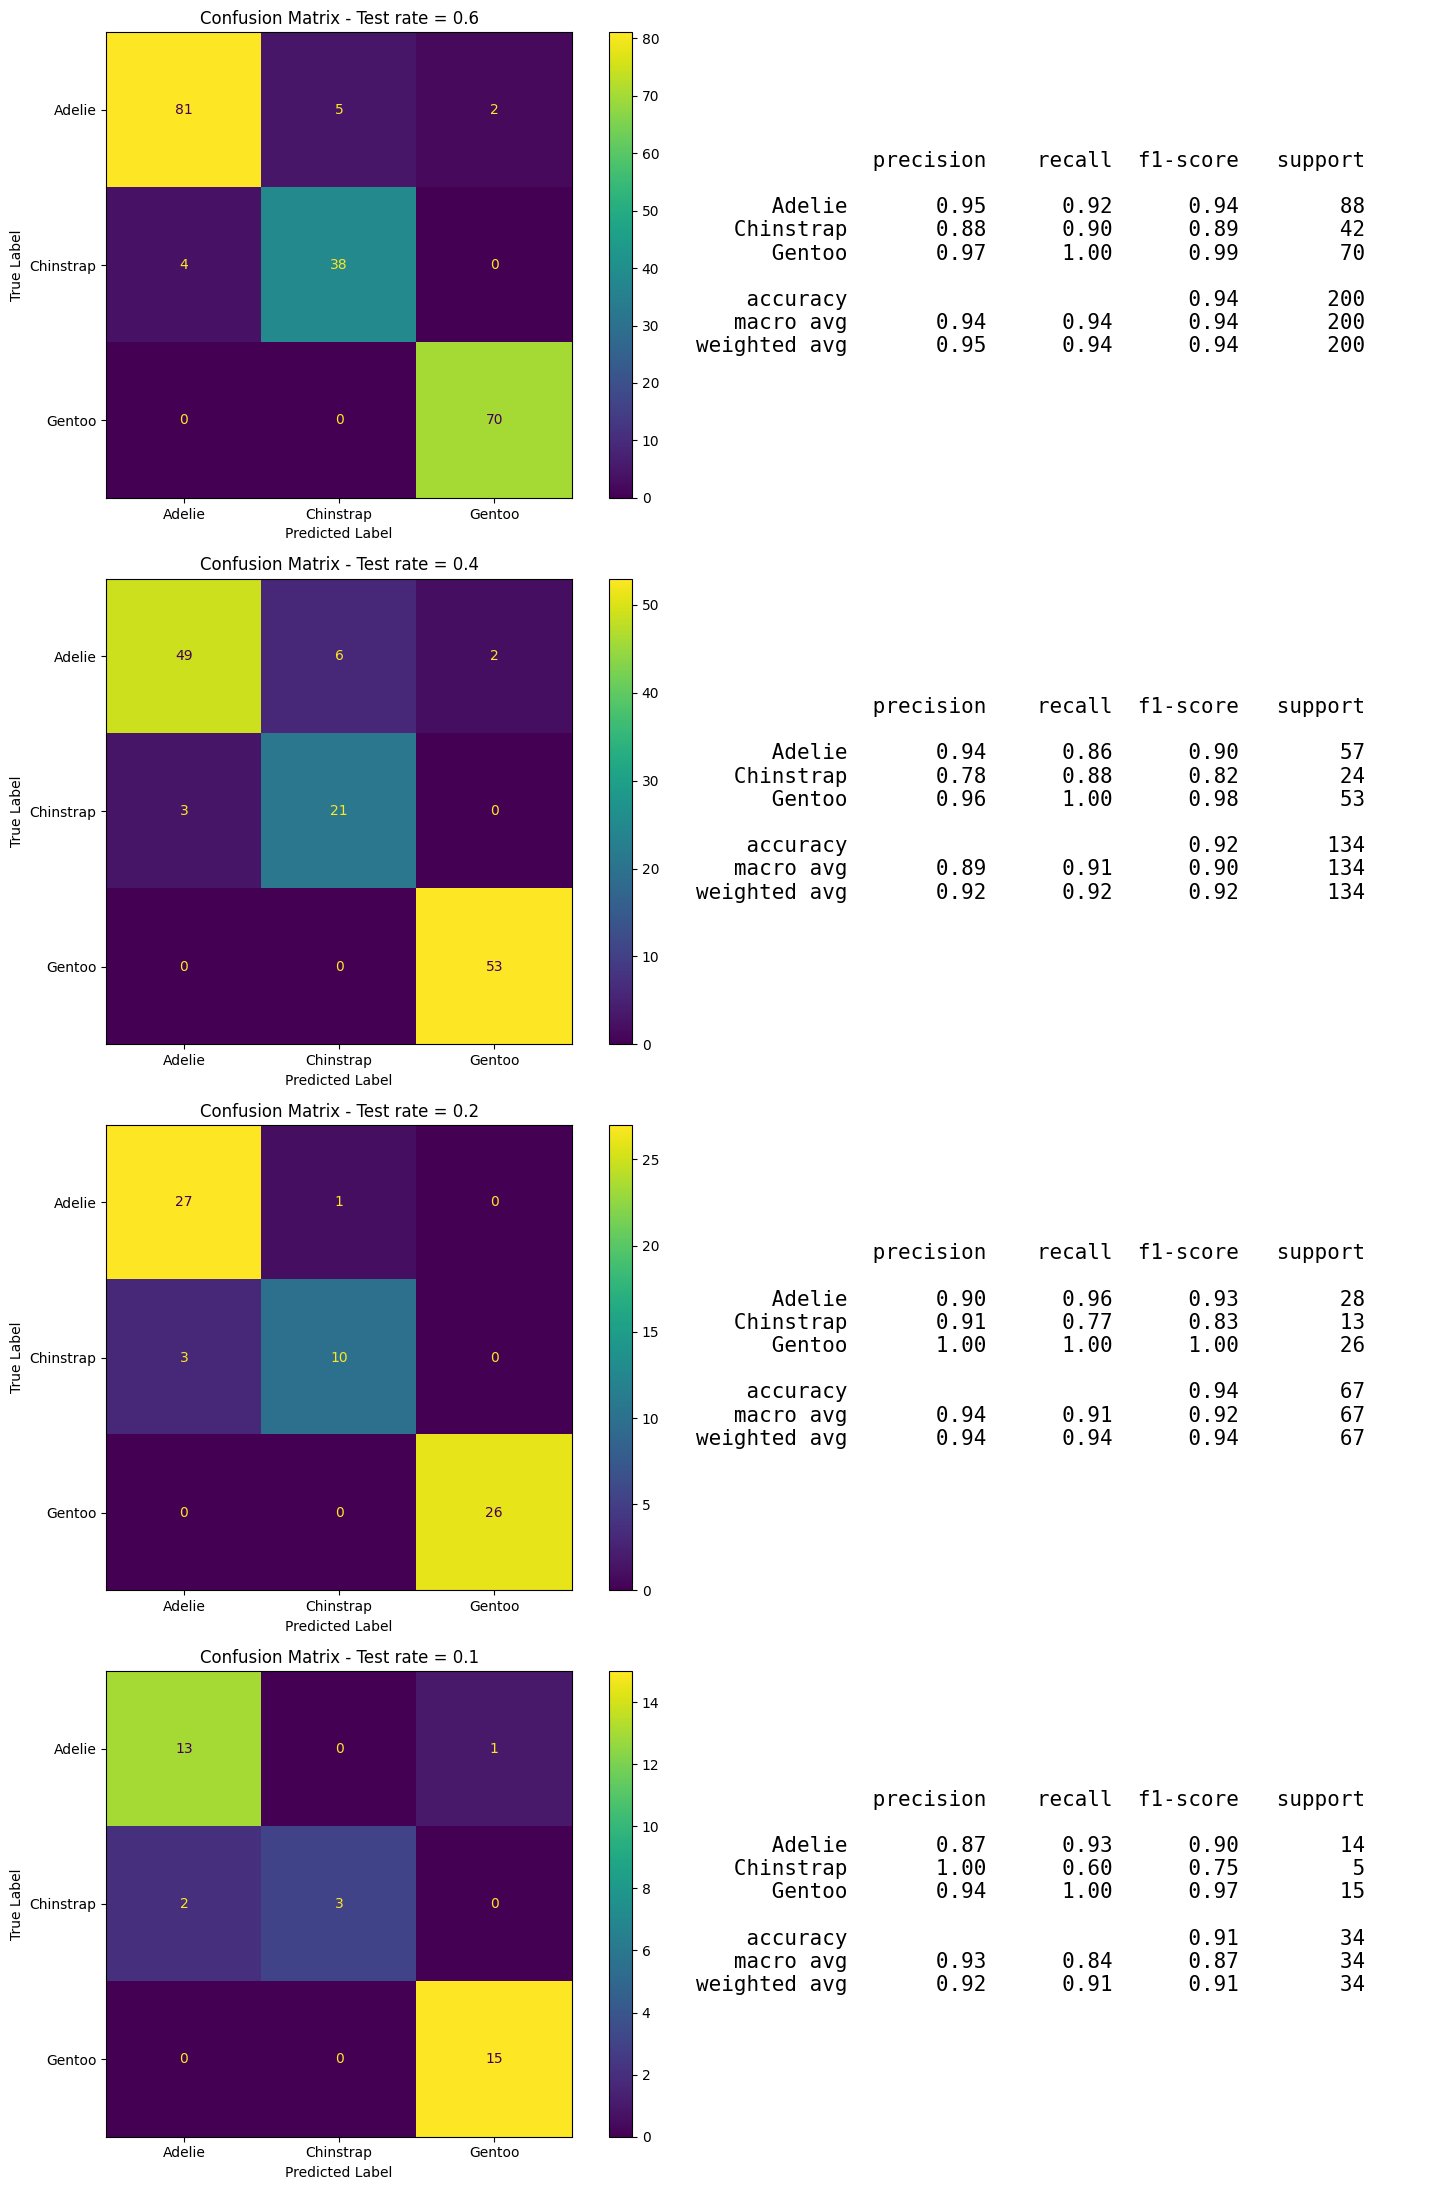

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, axes = plt.subplots(4, 2, figsize=(16, 22))  # 4 hàng 2 cột

# Report 1
report1 = classification_report(ytest1, y_prediction_unseen1)
disp1 = ConfusionMatrixDisplay.from_estimator(trained_model1, xtest1, ytest1, ax=axes[0, 0], colorbar=True)
axes[0, 0].set_title('Confusion Matrix - Test rate = 0.6')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')
axes[0, 1].axis('off')
axes[0, 1].text(0, 0.5, report1, fontsize=15, verticalalignment='center', fontfamily='monospace')

# Report 2
report2 = classification_report(ytest2, y_prediction_unseen2)
disp2 = ConfusionMatrixDisplay.from_estimator(trained_model2, xtest2, ytest2, ax=axes[1, 0], colorbar=True)
axes[1, 0].set_title('Confusion Matrix - Test rate = 0.4')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')
axes[1, 1].axis('off')
axes[1, 1].text(0, 0.5, report2, fontsize=15, verticalalignment='center', fontfamily='monospace')

# Report 3
report3 = classification_report(ytest3, y_prediction_unseen3)
disp3 = ConfusionMatrixDisplay.from_estimator(trained_model3, xtest3, ytest3, ax=axes[2, 0], colorbar=True)
axes[2, 0].set_title('Confusion Matrix - Test rate = 0.2')
axes[2, 0].set_xlabel('Predicted Label')
axes[2, 0].set_ylabel('True Label')
axes[2, 1].axis('off')
axes[2, 1].text(0, 0.5, report3, fontsize=15, verticalalignment='center', fontfamily='monospace')

# Report 4
report4 = classification_report(ytest4, y_prediction_unseen4)
disp4 = ConfusionMatrixDisplay.from_estimator(trained_model4, xtest4, ytest4, ax=axes[3, 0], colorbar=True)
axes[3, 0].set_title('Confusion Matrix - Test rate = 0.1')
axes[3, 0].set_xlabel('Predicted Label')
axes[3, 0].set_ylabel('True Label')
axes[3, 1].axis('off')
axes[3, 1].text(0, 0.5, report4, fontsize=15, verticalalignment='center', fontfamily='monospace')

plt.tight_layout()
plt.show()

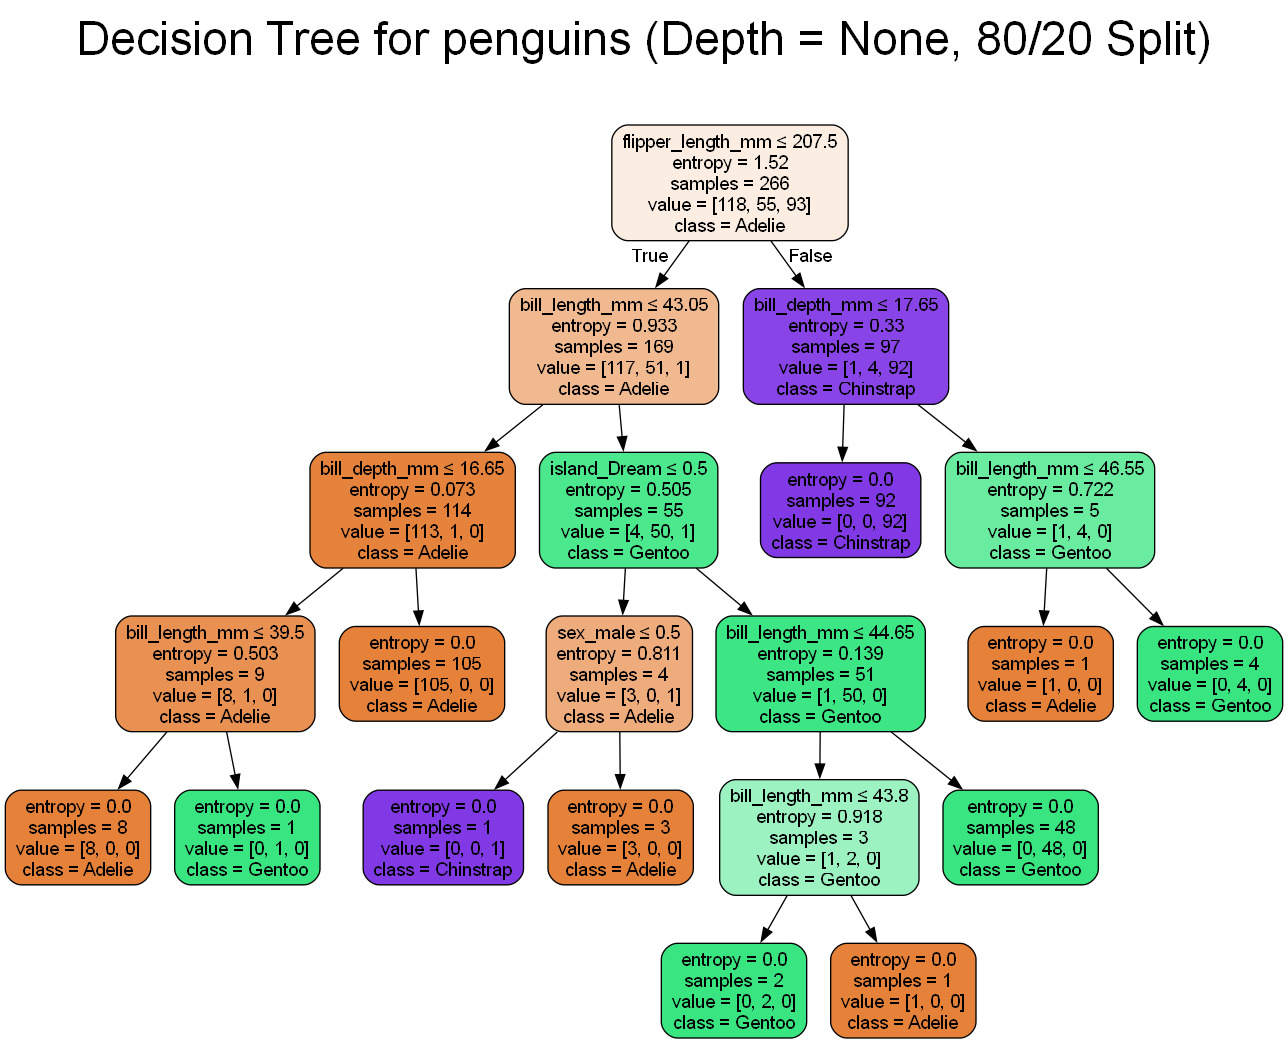

Trained data accuracy for 0.8 train-0.2 test: 1.00
Unseen data accuracy for 0.8 train-0.2 test: 0.94



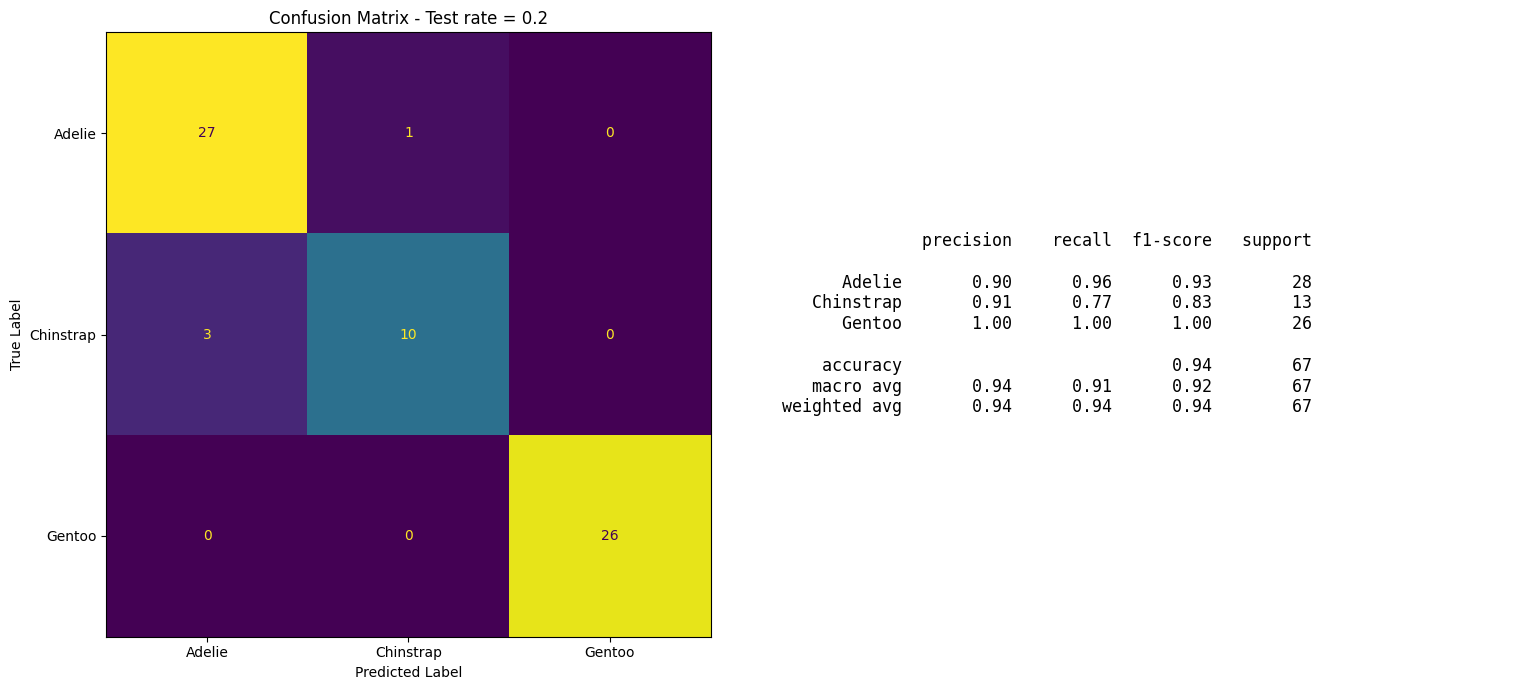

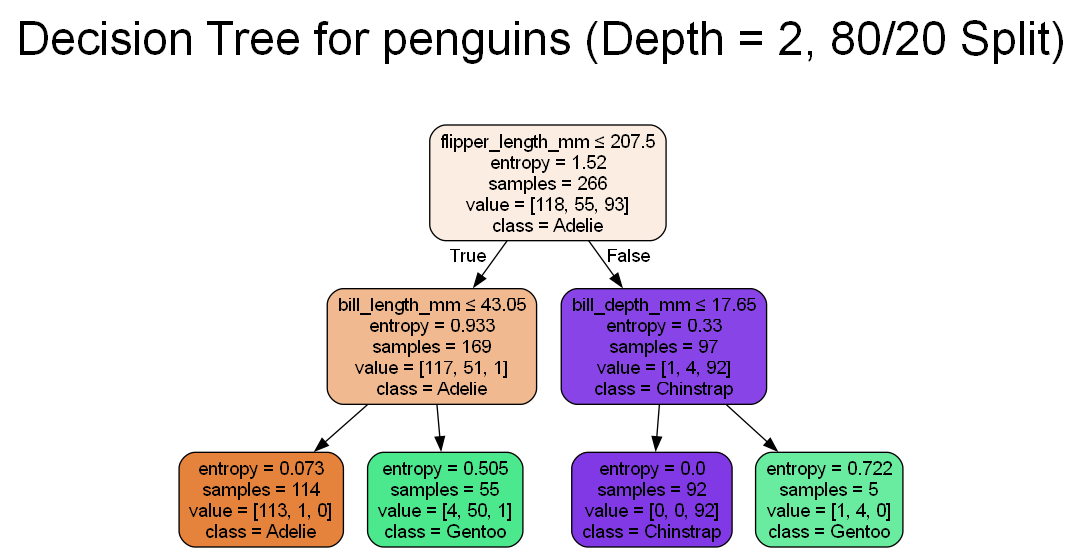

Trained data accuracy for 0.8 train-0.2 test: 0.97
Unseen data accuracy for 0.8 train-0.2 test: 0.88



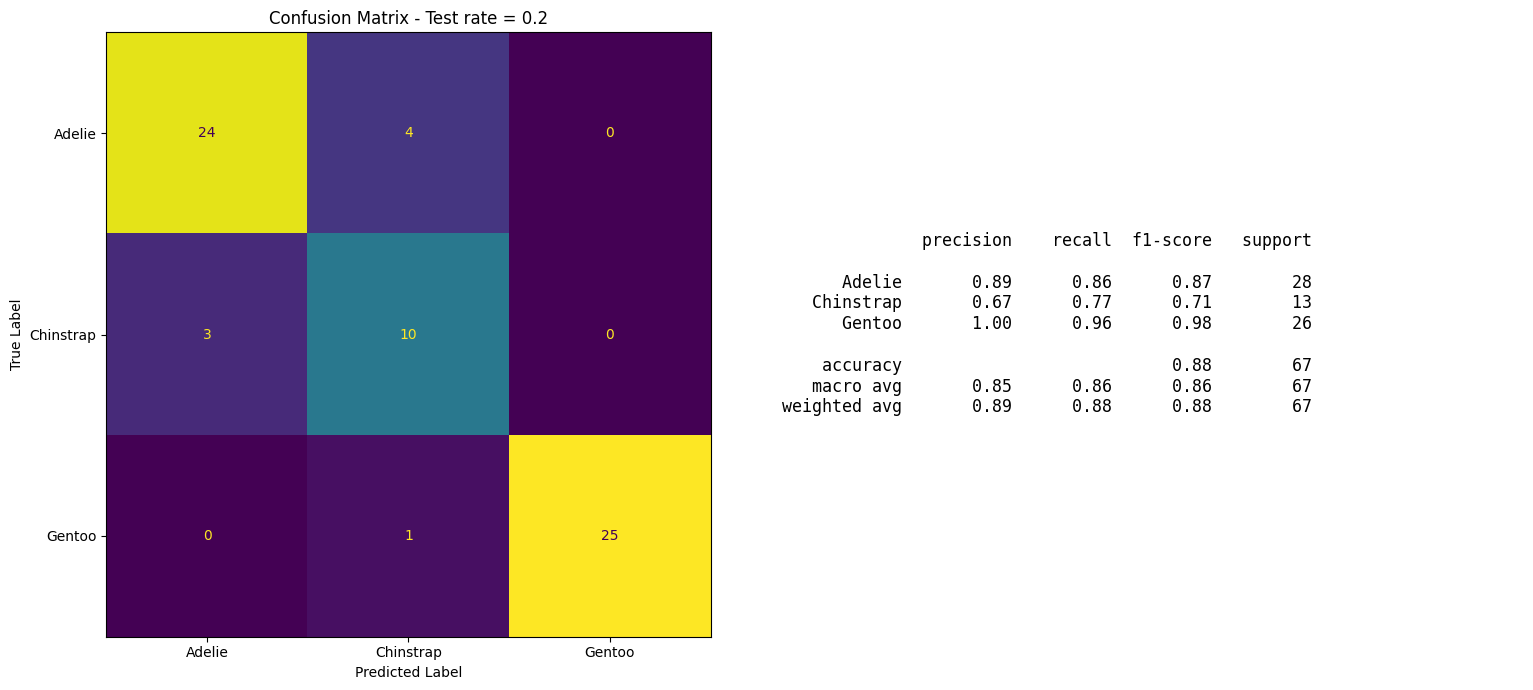

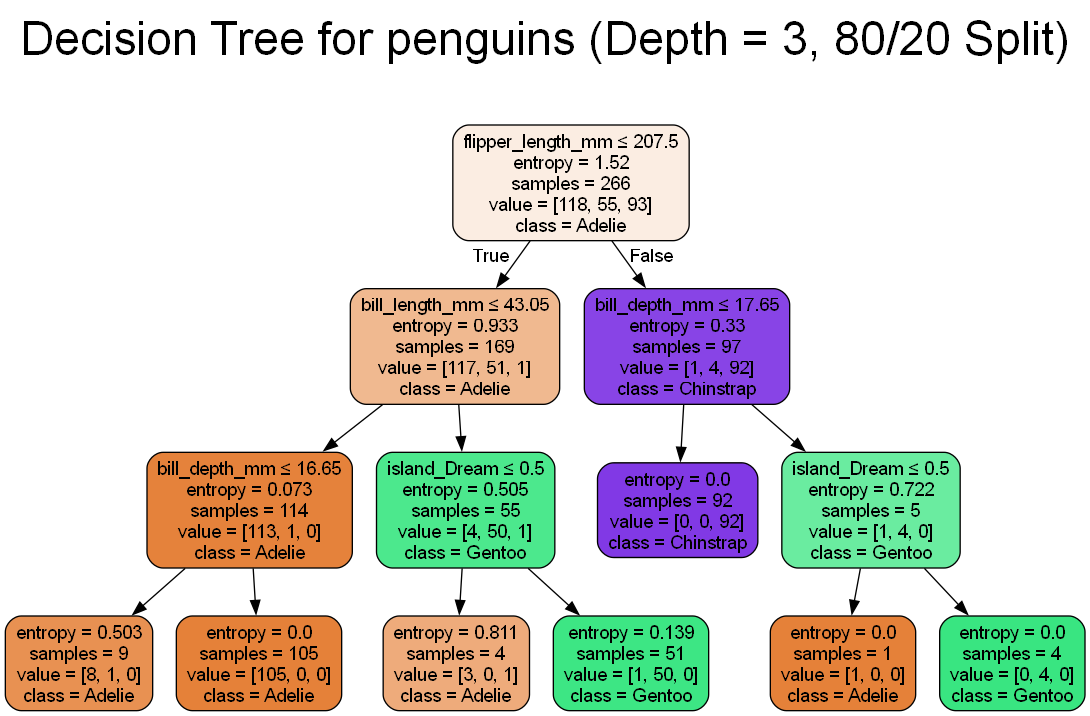

Trained data accuracy for 0.8 train-0.2 test: 0.99
Unseen data accuracy for 0.8 train-0.2 test: 0.91



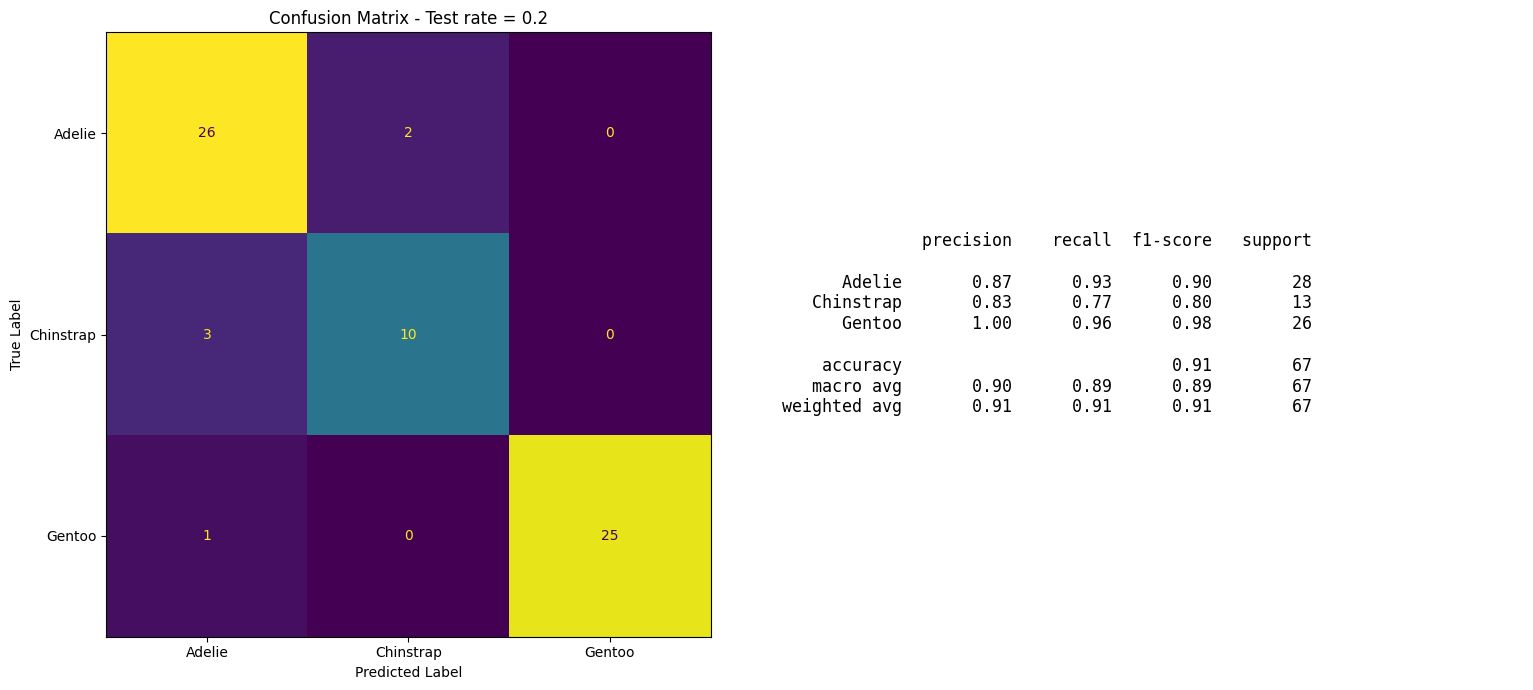

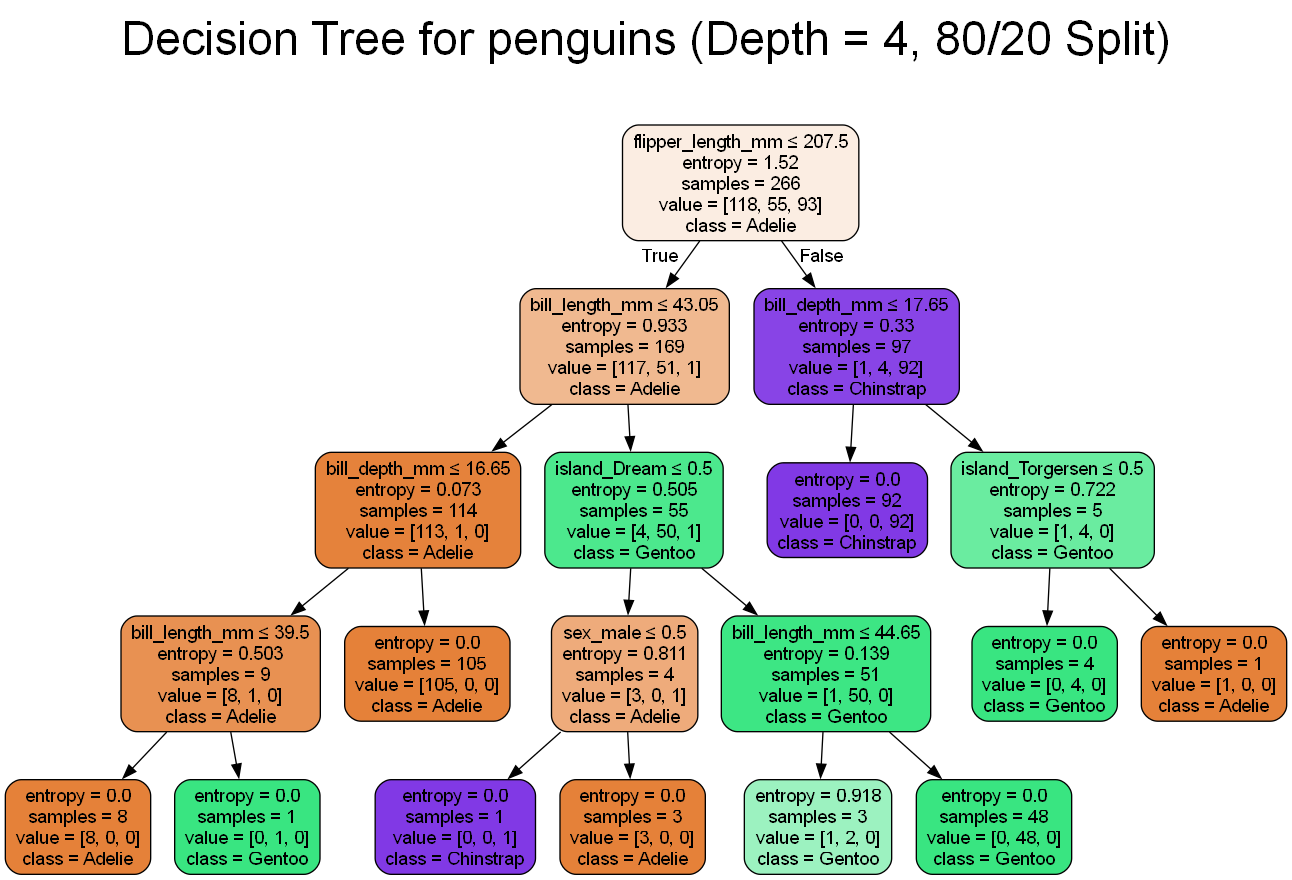

Trained data accuracy for 0.8 train-0.2 test: 1.00
Unseen data accuracy for 0.8 train-0.2 test: 0.93



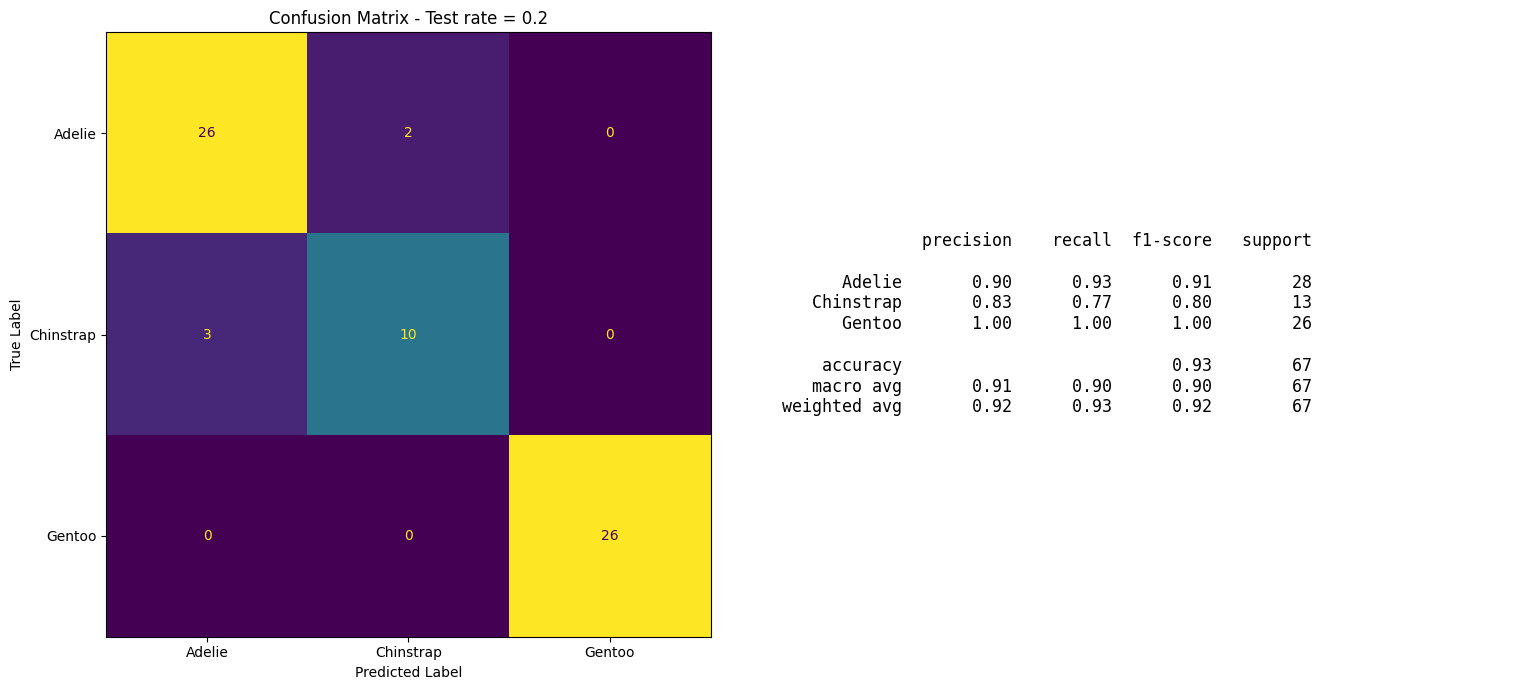

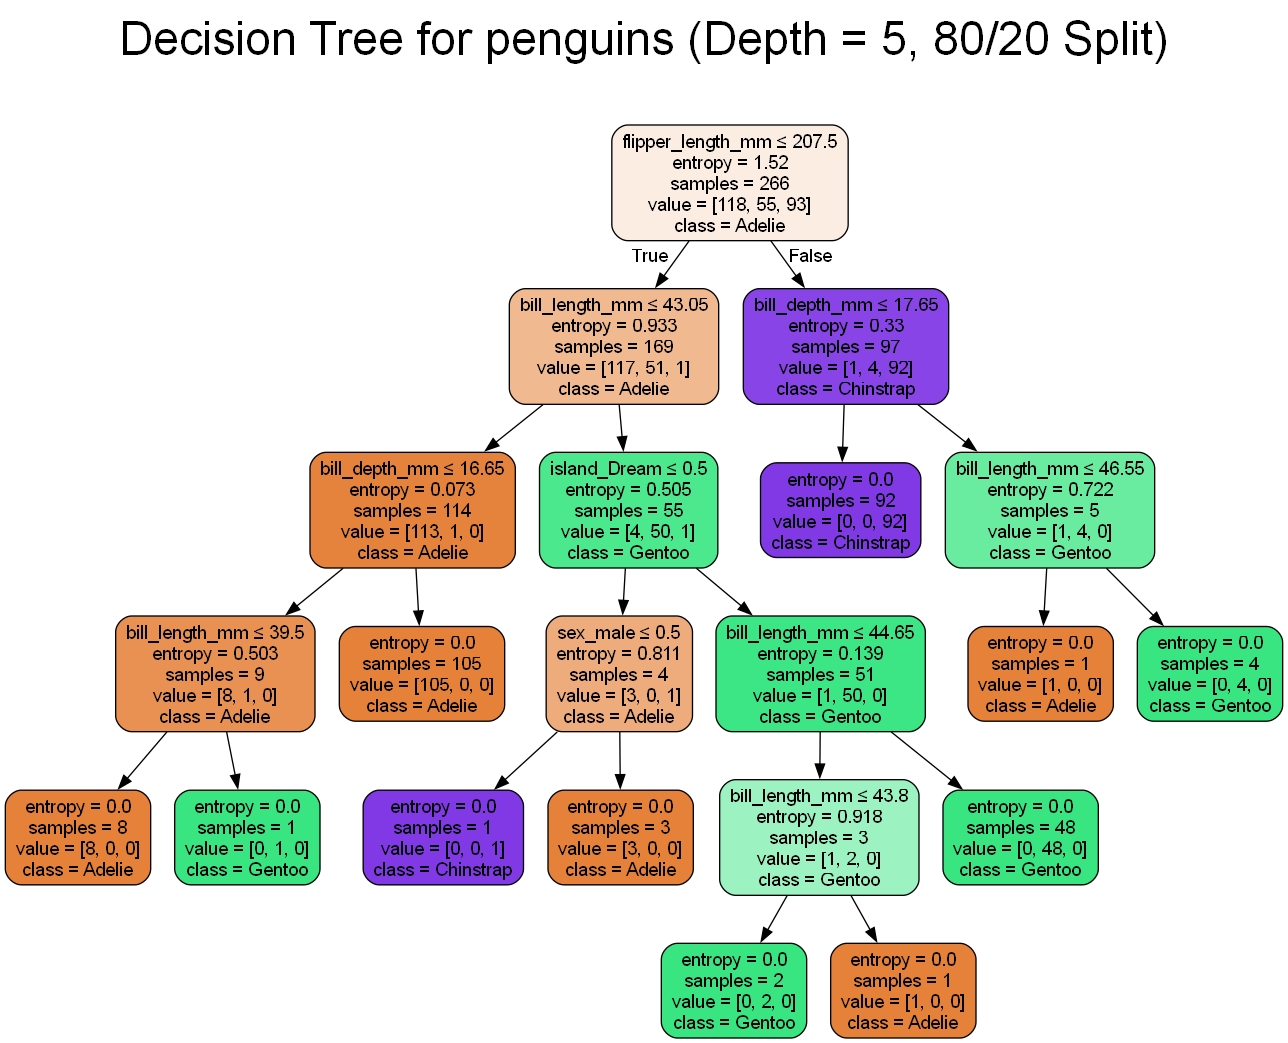

Trained data accuracy for 0.8 train-0.2 test: 1.00
Unseen data accuracy for 0.8 train-0.2 test: 0.94



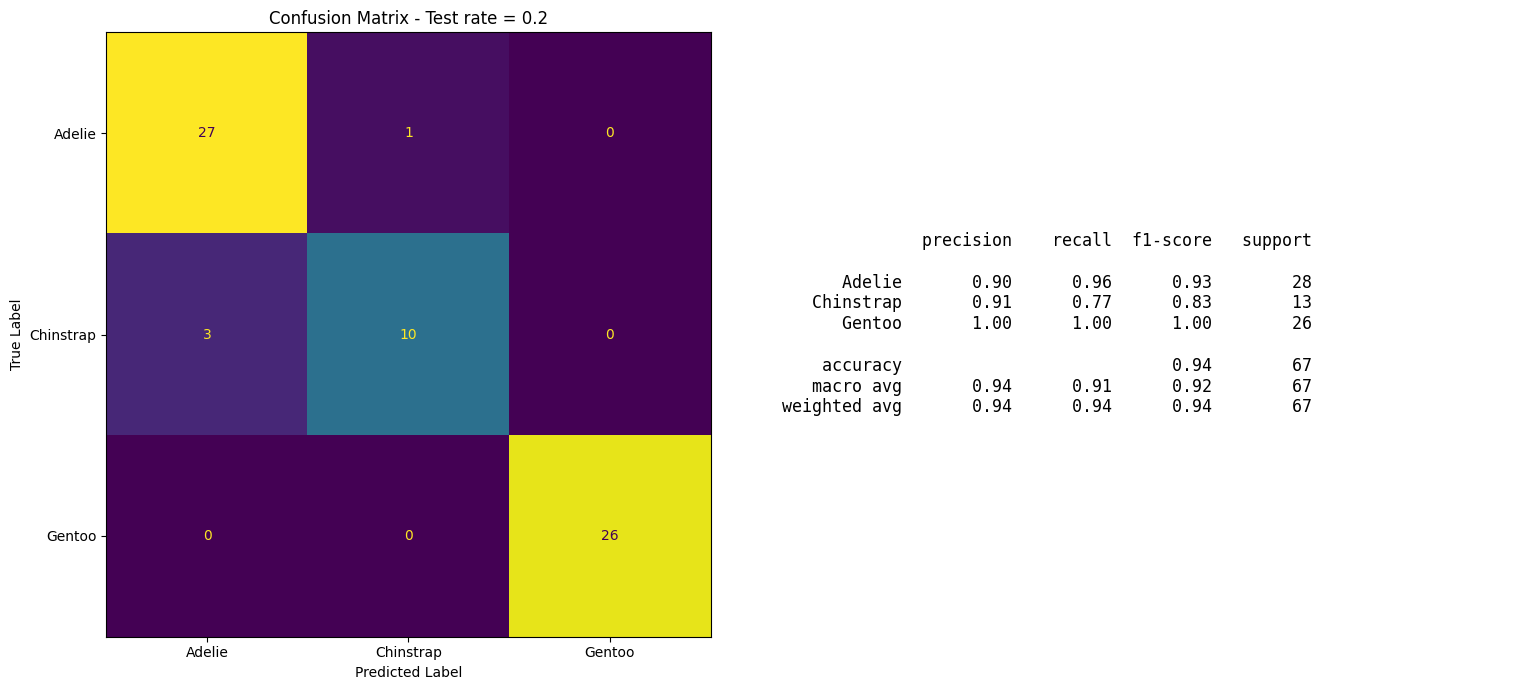

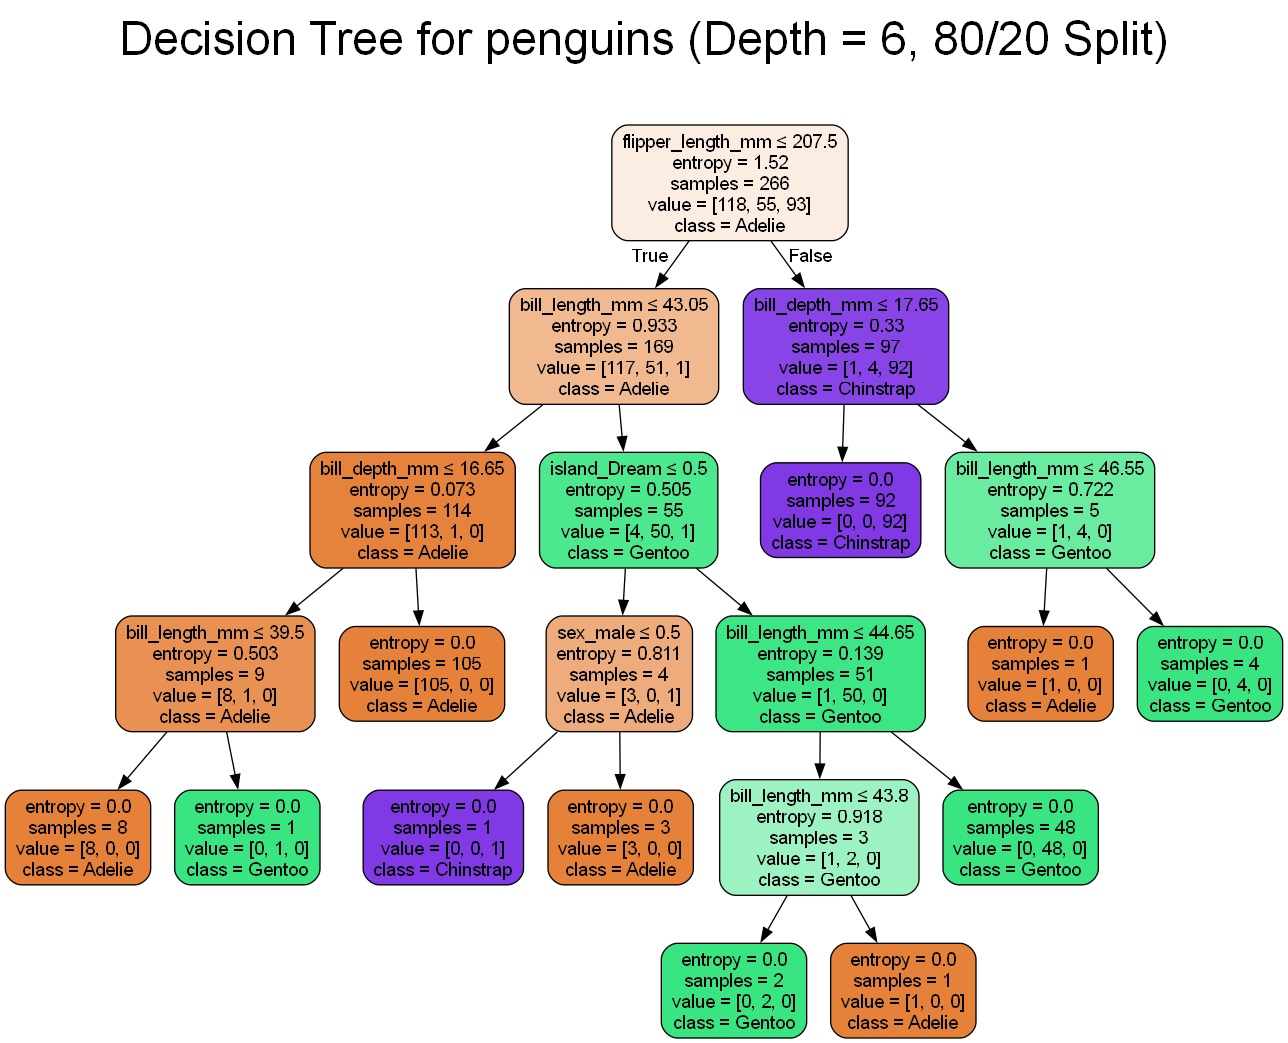

Trained data accuracy for 0.8 train-0.2 test: 1.00
Unseen data accuracy for 0.8 train-0.2 test: 0.94



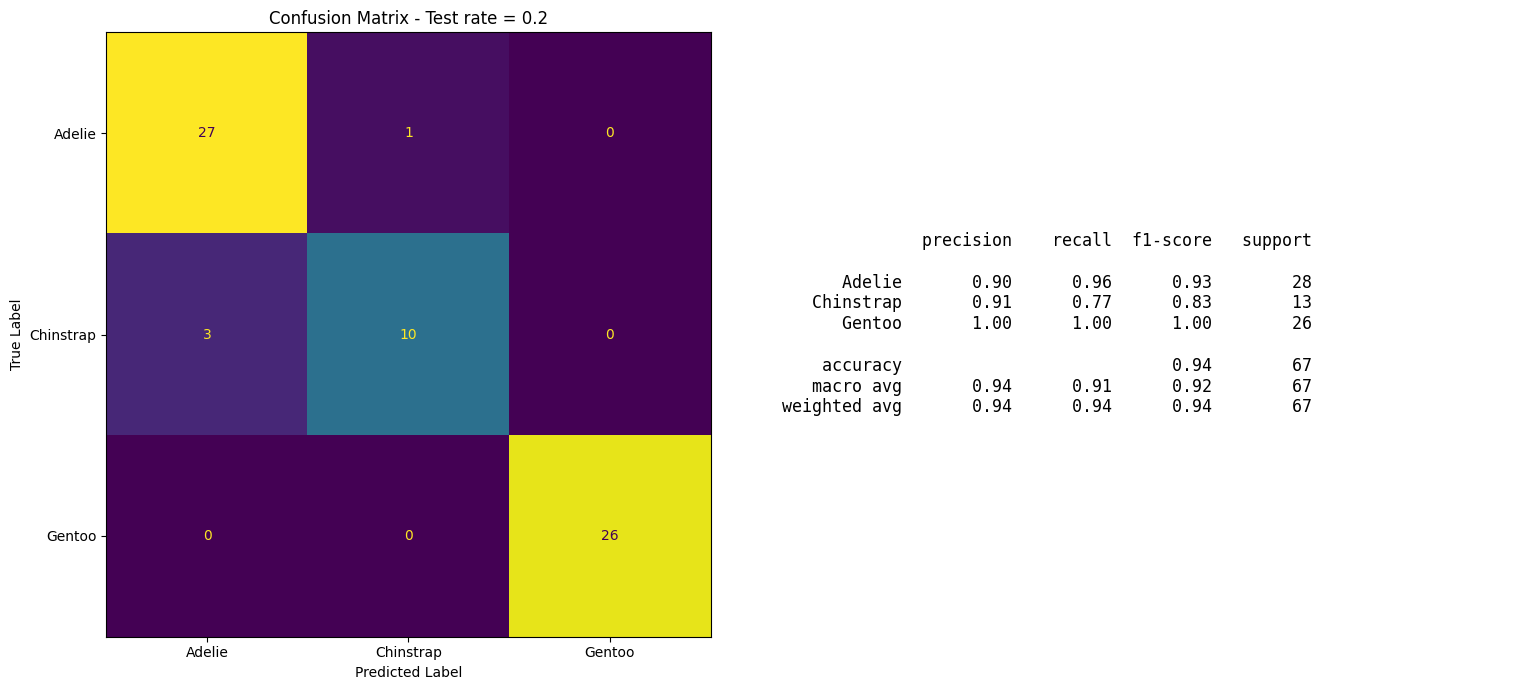

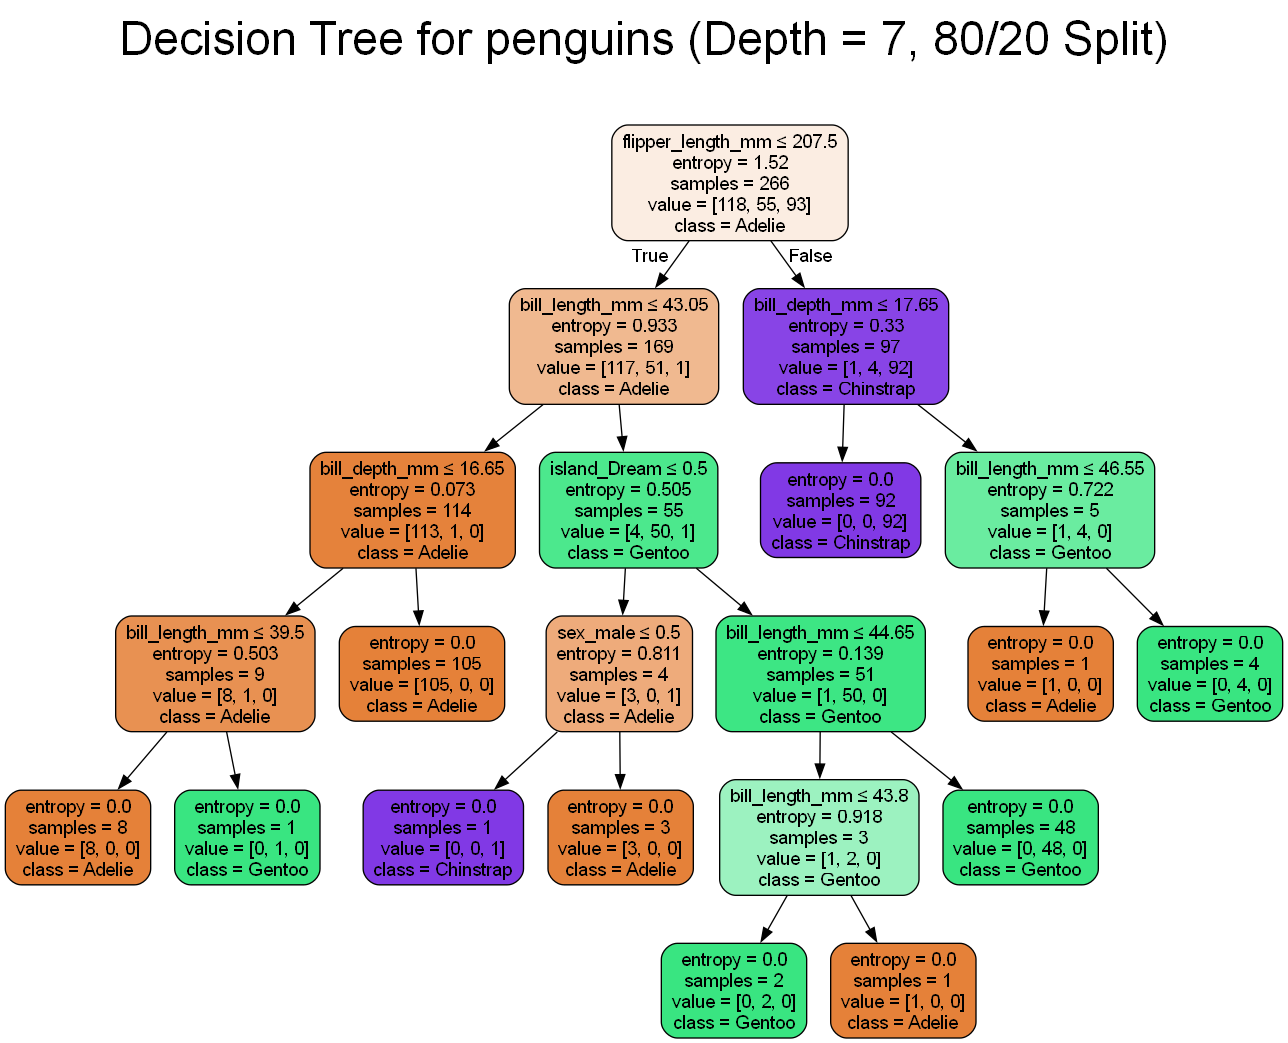

Trained data accuracy for 0.8 train-0.2 test: 1.00
Unseen data accuracy for 0.8 train-0.2 test: 0.94



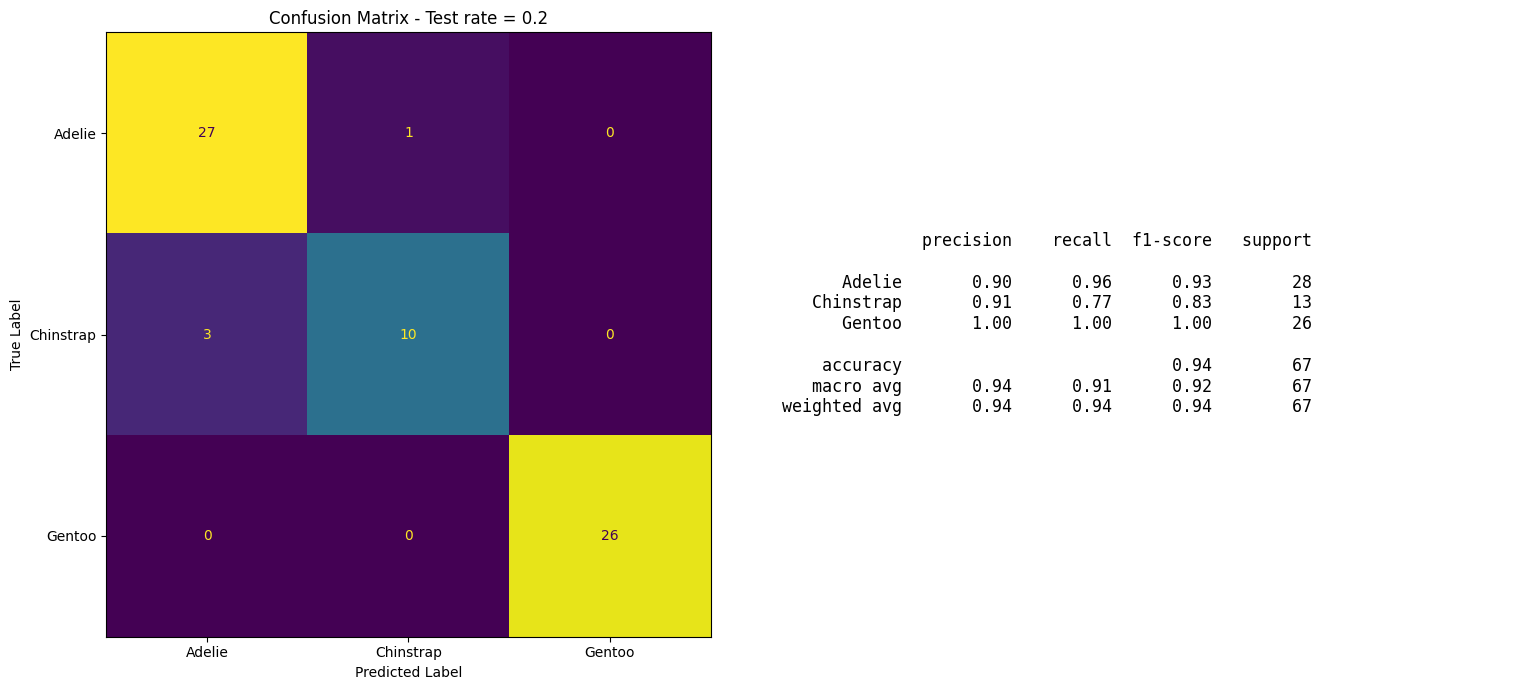

In [8]:
depth_limits = [None, 2, 3, 4, 5, 6, 7]
accuracy_list = []

for max_depth in depth_limits:
    trained_model3 = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state_choice_2, criterion="entropy")
    trained_model3.fit(xtrain3, ytrain3)

    output_file_name3 = output_folder + str(1 - all_test_ratio[2]) + "train-" + str(all_test_ratio[2]) + "test" + "_" + data_set_name
    posfix = ""
    if max_depth is None:
        posfix = "-No depth limit"
    else:
        posfix = "-" + "depth limit " + str(max_depth)

    output_file_name3 += posfix
    title3 = f"Decision Tree for {data_set_name} (Depth = {max_depth}, {int((1 - all_test_ratio[2]) * 100)}/{int(all_test_ratio[2] * 100)} Split)"
    display(save_and_show_tree(trained_model3, xtrain3.columns, class_names, output_file_name3, title3))

    # === Report and evaluation ===
    y_prediction_unseen3 = trained_model3.predict(xtest3)
    y_prediction_trained3 = trained_model3.predict(xtrain3)

    trained_data_accuracy3 = accuracy_score(ytrain3, y_prediction_trained3)
    unseen_data_accuracy3 = accuracy_score(ytest3, y_prediction_unseen3)

    accuracy_list.append(round(unseen_data_accuracy3, 2))

    print(f"Trained data accuracy for {1 - all_test_ratio[2]} train-{all_test_ratio[2]} test: {trained_data_accuracy3:.2f}")
    print(f"Unseen data accuracy for {1 - all_test_ratio[2]} train-{all_test_ratio[2]} test: {unseen_data_accuracy3:.2f}")
    print()

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    report3 = classification_report(ytest3, y_prediction_unseen3)
    disp3 = ConfusionMatrixDisplay.from_estimator(trained_model3, xtest3, ytest3, ax=axes[0], colorbar=False)
    axes[0].set_title('Confusion Matrix - Test rate = 0.2')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    axes[1].axis('off')
    axes[1].text(0, 0.5, report3, fontsize=12, verticalalignment='center', fontfamily='monospace')
    plt.tight_layout()
    plt.show()


,depth limit,None,2,3,4,5,6,7
0,accuracy,0.94,0.88,0.91,0.93,0.94,0.94,0.94


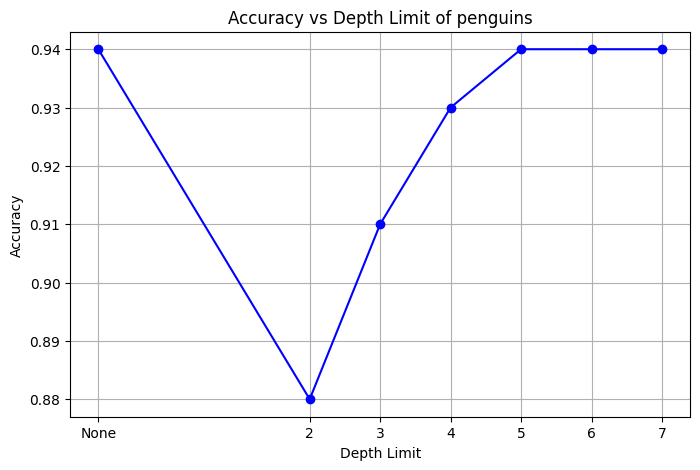

In [9]:
# Create a DataFrame
data = {
    "depth limit": ["accuracy"],  # first column
    "None": [accuracy_list[0]],
    2: [accuracy_list[1]],
    3: [accuracy_list[2]],
    4: [accuracy_list[3]],
    5: [accuracy_list[4]],
    6: [accuracy_list[5]],
    7: [accuracy_list[6]]
}

# Display it
display(pd.DataFrame(data))


depth_limits_numeric = [-1 if d is None else d for d in depth_limits]
plt.figure(figsize=(8, 5))
plt.plot(depth_limits_numeric, accuracy_list, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title(f'Accuracy vs Depth Limit of {data_set_name}')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.xticks(depth_limits_numeric, labels=[str(d) if d is not None else "None" for d in depth_limits])
plt.grid(True)
plt.show()